<a href="https://colab.research.google.com/github/ikramooe/DataScience-1/blob/master/Horse_Vs_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-05-17 23:23:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   121MB/s    in 1.2s    

2019-05-17 23:23:11 (121 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-05-17 23:23:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  25.7MB/s    in 0.4s    

2019-05-17 23:23:17 (25.7 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



/tmp/horse-or-human/horses
['horse12-2.png', 'horse38-1.png', 'horse43-6.png', 'horse29-6.png', 'horse37-9.png', 'horse24-4.png', 'horse35-0.png', 'horse30-6.png', 'horse40-7.png', 'horse50-8.png']
['human07-23.png', 'human10-15.png', 'human14-28.png', 'human05-04.png', 'human07-05.png', 'human13-24.png', 'human05-18.png', 'human15-17.png', 'human06-07.png', 'human15-05.png']
['human07-23.png', 'valhuman03-06.png', 'human10-15.png', 'valhuman03-18.png', 'valhuman05-11.png', 'human14-28.png', 'human05-04.png', 'human07-05.png', 'human13-24.png', 'human05-18.png']
['horse5-458.png', 'horse1-122.png', 'horse12-2.png', 'horse38-1.png', 'horse43-6.png', 'horse29-6.png', 'horse4-072.png', 'horse5-400.png', 'horse2-224.png', 'horse37-9.png']
0
(0, '/tmp/horse-or-human/humans/human05-06.png')
1
(1, '/tmp/horse-or-human/humans/human09-26.png')
2
(2, '/tmp/horse-or-human/humans/human06-01.png')
3
(3, '/tmp/horse-or-human/humans/human17-23.png')
4
(4, '/tmp/horse-or-human/humans/human14-24.png')


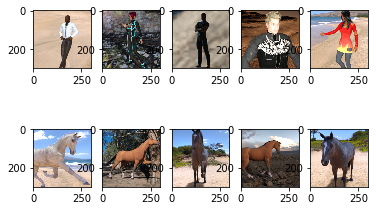

total training horse images: 500
total training human images: 527
total validation human images: 655
total training horse images: 628
Found 1027 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.
Epoch 1/15
9/9 [==============================] - 17s 2s/step - loss: 0.6567 - acc: 0.6972 - val_loss: 0.3692 - val_acc: 0.9088
Epoch 2/15
9/9 [==============================] - 10s 1s/step - loss: 0.7683 - acc: 0.8491 - val_loss: 0.5576 - val_acc: 0.7334
Epoch 3/15
9/9 [==============================] - 10s 1s/step - loss: 0.2961 - acc: 0.9133 - val_loss: 0.6752 - val_acc: 0.6422
Epoch 4/15
9/9 [==============================] - 10s 1s/step - loss: 0.2491 - acc: 0.8802 - val_loss: 0.3398 - val_acc: 0.9236
Epoch 5/15
9/9 [==============================] - 10s 1s/step - loss: 0.1841 - acc: 0.9270 - val_loss: 0.3488 - val_acc: 0.8636
Epoch 6/15
9/9 [==============================] - 10s 1s/step - loss: 0.1812 - acc: 0.9279 - val_loss: 0.8408 - val_acc: 0.8332
Epoch 7/15
9/9

In [0]:
#imageGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import requests
import zipfile
import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

local_zip = '/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
loc_zip = '/tmp/validation-horse-or-human.zip'
zip_rep = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir=os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir=os.path.join('/tmp/validation-horse-or-human/humans')

print(train_horse_dir)

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_human_names=os.listdir(validation_human_dir)
print(validation_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])




fig , axarr =plt.subplots(2,5)
img_human = [os.path.join(train_human_dir,fname)
      for fname in train_human_names[190:195] ]
img_horse = [os.path.join(train_horse_dir,fname)
      for fname in train_horse_names[100:105] ]
for img_path in enumerate(img_human):
	i = img_path[0]
	print(i)
	print(img_path)
	x = mpimg.imread(img_path[1])
	axarr[0][i].imshow(x)
	axarr[0,1].grid(False)
       
for img_path in enumerate(img_horse):
	i=img_path[0]
	x=mpimg.imread(img_path[1])
	axarr[1,i].imshow(x)
	axarr[1,i].grid(False)
plt.show()

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))
print('total training horse images:', len(os.listdir(validation_horse_dir)))

train_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
	'/tmp/horse-or-human/',
	target_size=(150,150),
	batch_size=128,
	class_mode='binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
	'/tmp/validation-horse-or-human/',
	target_size=(150,150),
	batch_size=32,
	class_mode='binary')


model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape=(150,150,3)),
	tf.keras.layers.MaxPooling2D(2, 2),
	tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
	tf.keras.layers.MaxPooling2D(2,2),
	tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
	tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(512,activation='relu'),
	tf.keras.layers.Dense(1,activation='sigmoid')

	])

model.compile(loss='binary_crossentropy',
	optimizer=RMSprop(lr=0.001),
	metrics=['accuracy'])

history = model.fit_generator(
	train_generator,
	steps_per_epoch=8, # we walk through 8 batches to say that one epoch is done 
	epochs=15,#how many times we walk through all the training data
  validation_data=validation_generator,
  validation_steps = 8 ) #0 silent 1 progress  2 one line per epoch 



**Running The Model

In [0]:
from google.colab import files
from keras.preprocessing import image 
import numpy as np
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

uploaded = files.upload()
for fn in uploaded.keys():
  #predicting images
  path = '/content/'+fn
  img = image.load_img(path,target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
   
  classes = model.predict_proba(x)
  print(classes)
 
 if classes[0]>0.5: 
#then class 1 
    print(fn + "this is a human")
  else:#or class 0 
    print(fn + "this is a horse")
      

Saving large.png to large.png
[[1. 0.]]


Clean Up

In [0]:
import os,signal
os.kill(os.getpid(),signal.SIGKILL)